In [ ]:
! pip install transformers==4.28.0
! pip install accelerate
! pip install datasets
! pip install nltk
! pip install huggingface_hub
! pip install sentencepiece
! pip install evaluate
! pip install gdown
! pip install git-lfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load Datasets

In [ ]:
from datasets import load_dataset
dataset = load_dataset("bitext/customer-support-intent-dataset")

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 6539
    })
    validation: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
    test: Dataset({
        features: ['utterance', 'intent', 'category', 'tags'],
        num_rows: 818
    })
})


In [ ]:
# convert datasetdict to pandas format
train = dataset["train"].to_pandas()
validation = dataset["validation"].to_pandas()
test = dataset["test"].to_pandas()

In [ ]:
train

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
validation

utterance        intent category  \
0          I want help to cancel the order I have made  cancel_order    ORDER   
1    where can I get information about order cancel...  cancel_order    ORDER   
2                        help to cancel the last order  cancel_order    ORDER   
3           I need help with canceling an order I made  cancel_order    ORDER   
4      I do not know how I can cancel the order I made  cancel_order    ORDER   
..                                                 ...           ...      ...   
813                   I try to check the refund status  track_refund   REFUND   
814       I want assistance to check the refund status  track_refund   REFUND   
815  I want assistance checking the status of the r...  track_refund   REFUND   
816                  how can I check my refund status?  track_refund   REFUND   
817                       where do I track the refund?  track_refund   REFUND   

    tags  
0      B  
1    BIM  
2      B  
3      B  
4     BE  
..   ...  
813    B  
814    B  
815    B  
816   BI  
817   BI  

[818 rows x 4 columns]

In [ ]:
test

utterance        intent category  \
0         I have a question about cancelling an order  cancel_order    ORDER   
1                help canceling the order I have made  cancel_order    ORDER   
2    I do not know how to cancel an order I have made  cancel_order    ORDER   
3           where can I cancel the last order I made?  cancel_order    ORDER   
4                  I don't want the last order I made  cancel_order    ORDER   
..                                                ...           ...      ...   
813      I am trying to check the status of my refund  track_refund   REFUND   
814                   help checking the refund status  track_refund   REFUND   
815                will you show me my refund status?  track_refund   REFUND   
816                          help to track the refund  track_refund   REFUND   
817                   I am trying to track the refund  track_refund   REFUND   

    tags  
0      B  
1      B  
2     BE  
3     BI  
4      B  
..   ...  
813    B  
814    B  
815  BIP  
816    B  
817    B  

[818 rows x 4 columns]

## Save to csv format

In [ ]:
train.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_train.csv', index=False)

In [ ]:
validation.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_validation.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_test.csv', index=False)

# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMDENA DATASET/df_train.csv')

In [ ]:
df

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6539 entries, 0 to 6538
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   utterance  6539 non-null   object
 1   intent     6539 non-null   object
 2   category   6539 non-null   object
 3   tags       6539 non-null   object
dtypes: object(4)
memory usage: 204.5+ KB


In [ ]:
df['length'] = df['utterance'].apply(lambda x: len(x.split()))

In [ ]:
df

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  length  
0       ORDER  BIP      10  
1       ORDER   BK       2  
2       ORDER    B      10  
3       ORDER    B       7  
4       ORDER    B      10  
...       ...  ...     ...  
6534   REFUND   BE      13  
6535   REFUND   BK       3  
6536   REFUND    B       6  
6537   REFUND  BIM      12  
6538   REFUND   BI      12  

[6539 rows x 5 columns]

In [ ]:
# check descriptive statistics for numeric column

df.describe(exclude='object').T

count      mean       std  min  25%  50%   75%   max
length  6539.0  8.318244  2.404325  1.0  7.0  8.0  10.0  15.0

from result we know the minimum length of utterance is 1 and the maximum length is 15

In [ ]:
df[df['length'] == 1]

utterance          intent  category tags  length
1750    complaint       complaint  FEEDBACK    B       1
2452  registering  create_account   ACCOUNT    B       1
2631     register  create_account   ACCOUNT   BK       1
5336       review          review  FEEDBACK   BK       1

In [ ]:
df[df['length'] == 15]

utterance           intent  \
2451  I do not know what I have to do to open a new ...   create_account   
2601  i do not know what i need to do to open a new ...   create_account   
3213  I do not know how I can check how soon can I e...  delivery_period   
3948  I do not know what I have to do to get a refun...       get_refund   
3977  I do not know what I need to do to get a refun...       get_refund   
4621  I do not know what I need to do to buy some of...      place_order   
4679  I do not know what I need to do to buy several...      place_order   
4713  I don't know what I need to do to buy a few of...      place_order   
4748  I do not know what I have to do to buy several...      place_order   
5933  i do not know what i have to do to switch to m...   switch_account   

      category  tags  length  
2451   ACCOUNT   BEL      15  
2601   ACCOUNT  BELQ      15  
3213  DELIVERY    BE      15  
3948    REFUND    BE      15  
3977    REFUND    BE      15  
4621     ORDER   BEM      15  
4679     ORDER   BEM      15  
4713     ORDER    BM      15  
4748     ORDER   BEM      15  
5933   ACCOUNT  BELQ      15

In [ ]:
# check descriptive statistics for categorical column

df.describe(exclude='number').T

count unique                                               top  freq
utterance  6539   6539  would it be possible to cancel the order I made?     1
intent     6539     27                                       get_invoice   268
category   6539     11                                           ACCOUNT  1412
tags       6539    107                                                 B  1898

from result we know the intent of get_invoice has maximum frequency and the category of ACCOUNT has the maximum frequency

In [ ]:
# check for NaN value

df.isna().sum()

utterance    0
intent       0
category     0
tags         0
length       0
dtype: int64

In [ ]:
# check for duplicated value

df.duplicated(subset='utterance').sum()

0

## Category

In [ ]:
# get the 5 highest amount of data from each category

custom_order = df.category.value_counts().nlargest(5).index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

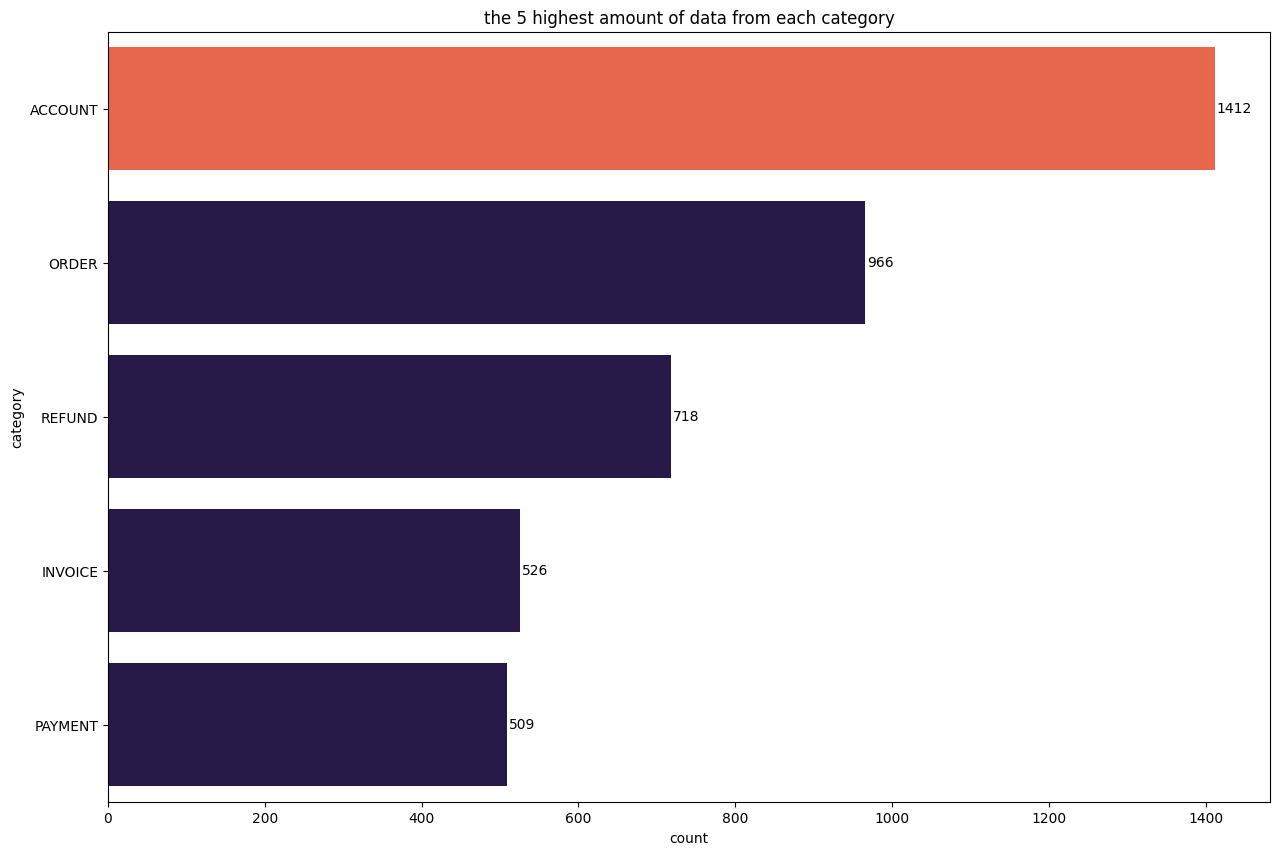

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('the 5 highest amount of data from each category')
sns.countplot(data=df, y='category', order=custom_order, palette=palette)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center', fontsize=10, color='black')

plt.show()

the account category has the highest number of data frequencies. Let's check what intents have the most frequency in the ACCOUNT category

In [ ]:
custom_order = df.intent[df['category']=='ACCOUNT'].value_counts().index

In [ ]:
strong_color = '#FF5733'

In [ ]:
palette = [strong_color if cat == custom_order[0] else sns.color_palette("magma")[0] for cat in custom_order]

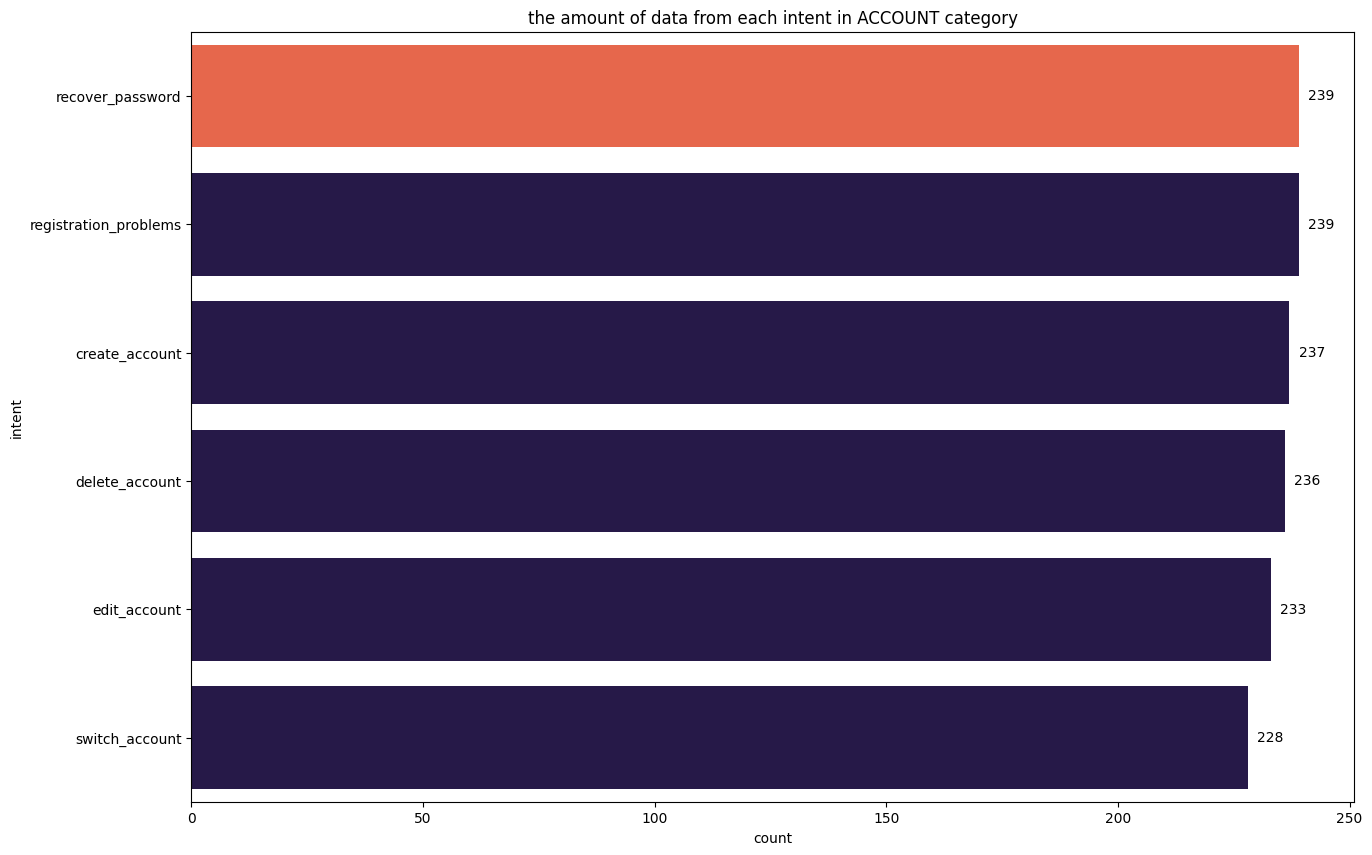

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('the amount of data from each intent in ACCOUNT category')
sns.countplot(data=df, y=df.intent[df['category']=='ACCOUNT'], order=custom_order, palette=palette)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, int(p.get_width()), ha='left', va='center', fontsize=10, color='black')


plt.show()

in the category of ACCOUNT, recover_password has the most frequency

## Intent

In [ ]:
custom_order = df.intent.value_counts().index

In [ ]:
# make a df for only maximum and minimum intent count
custom_df = df[df['intent'].isin([custom_order[0], custom_order[-1]])].reset_index(drop=True)

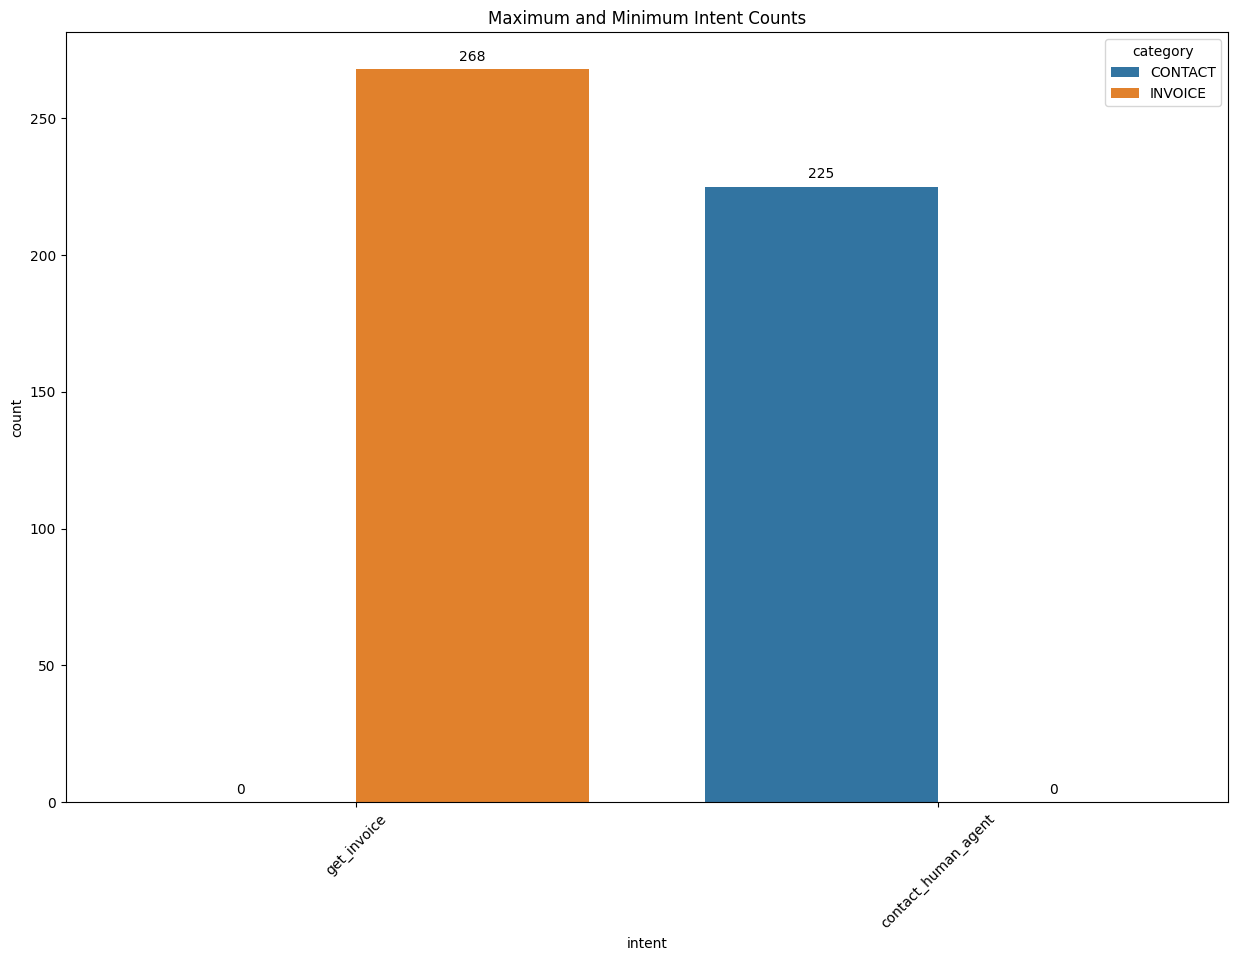

In [ ]:
plt.figure(figsize=(15, 10))
plt.title('Maximum and Minimum Intent Counts')
sns.countplot(data=custom_df, x='intent', hue='category', order=[custom_order[0], custom_order[-1]])

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 2, int(p.get_height()), ha='center', va='bottom', fontsize=10, color='black')

plt.xticks(rotation=45)
plt.show()

based on the plot, we know that the intent with the highest frequency is get_invoice and the lowest is contact_human_agent whivh belong to the category of INVOICE and CONTACT respectively

In [ ]:
for i,j in enumerate(df.intent.unique()):

  print('{}. INTENT: {} CATEGORY: {} \n'.format(i+1, j, df['category'][df.intent == j].unique()))

1. INTENT: cancel_order CATEGORY: ['ORDER'] 

2. INTENT: change_order CATEGORY: ['ORDER'] 

3. INTENT: change_shipping_address CATEGORY: ['SHIPPING_ADDRESS'] 

4. INTENT: check_cancellation_fee CATEGORY: ['CANCELLATION_FEE'] 

5. INTENT: check_invoice CATEGORY: ['INVOICE'] 

6. INTENT: check_payment_methods CATEGORY: ['PAYMENT'] 

7. INTENT: check_refund_policy CATEGORY: ['REFUND'] 

8. INTENT: complaint CATEGORY: ['FEEDBACK'] 

9. INTENT: contact_customer_service CATEGORY: ['CONTACT'] 

10. INTENT: contact_human_agent CATEGORY: ['CONTACT'] 

11. INTENT: create_account CATEGORY: ['ACCOUNT'] 

12. INTENT: delete_account CATEGORY: ['ACCOUNT'] 

13. INTENT: delivery_options CATEGORY: ['DELIVERY'] 

14. INTENT: delivery_period CATEGORY: ['DELIVERY'] 

15. INTENT: edit_account CATEGORY: ['ACCOUNT'] 

16. INTENT: get_invoice CATEGORY: ['INVOICE'] 

17. INTENT: get_refund CATEGORY: ['REFUND'] 

18. INTENT: newsletter_subscription CATEGORY: ['NEWSLETTER'] 

19. INTENT: payment_issue CATEGORY: 

## Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stpwrds = set(STOPWORDS)

In [ ]:
for i in stopwords.words('english'):

  if i not in stpwrds:
    stpwrds.update([i])

In [ ]:
wordCloud_data = df.copy()
wordCloud_data['utterance'] = wordCloud_data['utterance'].apply(lambda x: x.lower())

In [ ]:
def word_cloud(data):

  text = ' '.join([text for text in data])

  # Create stopword list:
  stopwords = set(stpwrds)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(15,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  text_dictionary = wordcloud.process_text(text)
  # sort the dictionary
  word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

  #use words_ to print relative word frequencies
  #rel_freq=wordcloud.words_

  #print results
  print(f'\n')
  print(f'most frequency of word:')
  print(list(word_freq.items())[:10])
  print(f'\n')
  print(f'least frequency of word:')
  print(list(word_freq.items())[-30:-1])

### ORDER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ORDER'].copy().reset_index(drop=True)

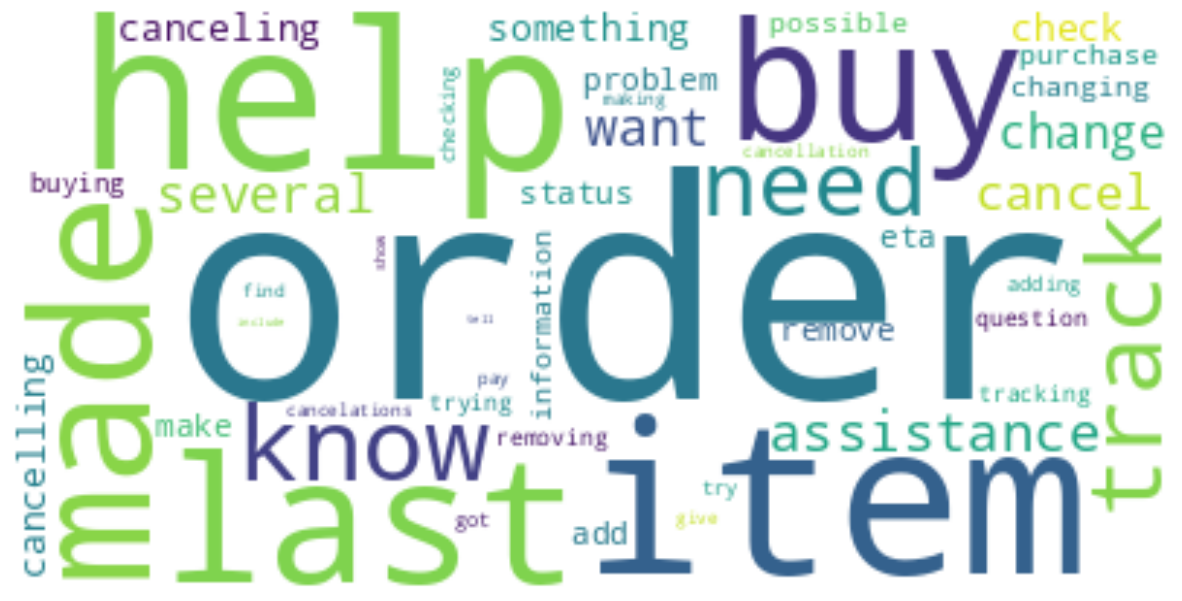



most frequency of word:
[('order', 684), ('item', 273), ('help', 259), ('last', 176), ('buy', 161), ('made', 153), ('know', 139), ('track', 132), ('need', 131), ('assistance', 108)]


least frequency of word:
[('possible', 32), ('purchase', 32), ('buying', 27), ('question', 23), ('tracking', 23), ('trying', 21), ('removing', 20), ('adding', 16), ('try', 15), ('got', 15), ('checking', 15), ('pay', 10), ('give', 10), ('cancelations', 9), ('cancellation', 9), ('making', 9), ('find', 8), ('show', 5), ('tell', 4), ('include', 4), ('forgotten', 2), ('purchased', 2), ('missed', 2), ('forgot', 2), ('looking', 1), ('product', 1), ('ones', 1), ('wanted', 1), ('wrong', 1)]


In [ ]:
word_cloud(data)

### SHIPPING ADDRESS

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='SHIPPING_ADDRESS'].copy().reset_index(drop=True)

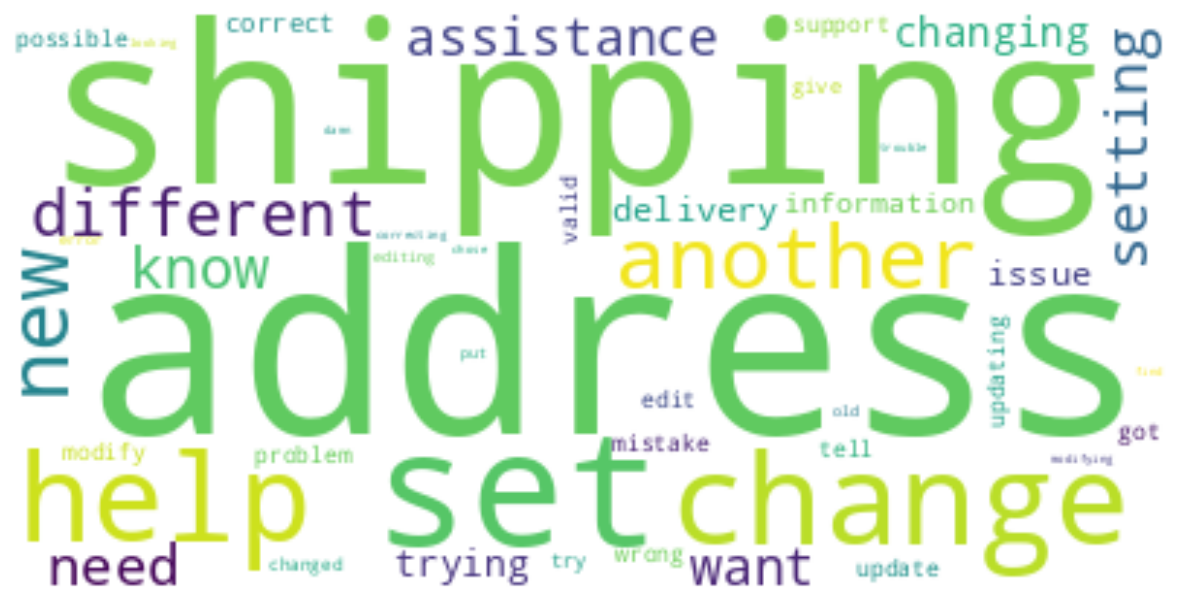



most frequency of word:
[('address', 472), ('shipping', 410), ('set', 179), ('change', 105), ('help', 94), ('another', 86), ('new', 82), ('different', 75), ('know', 60), ('setting', 60)]


least frequency of word:
[('correcting', 3), ('chose', 3), ('damn', 3), ('looking', 3), ('modifying', 3), ('trouble', 3), ('find', 3), ('uhelp', 2), ('chosen', 2), ('question', 2), ('asistance', 1), ('addresxs', 1), ('submitted', 1), ('uupdatte', 1), ('updatng', 1), ('havesubmitted', 1), ('addrses', 1), ('tto', 1), ('nede', 1), ('corrdct', 1), ('dont', 1), ('hwat', 1), ('thedelivery', 1), ('goddamn', 1), ('knlw', 1), ('ot', 1), ('uchange', 1), ('wanna', 1), ('upodate', 1)]


In [ ]:
word_cloud(data)

### CANCELLATION FEE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CANCELLATION_FEE'].copy().reset_index(drop=True)

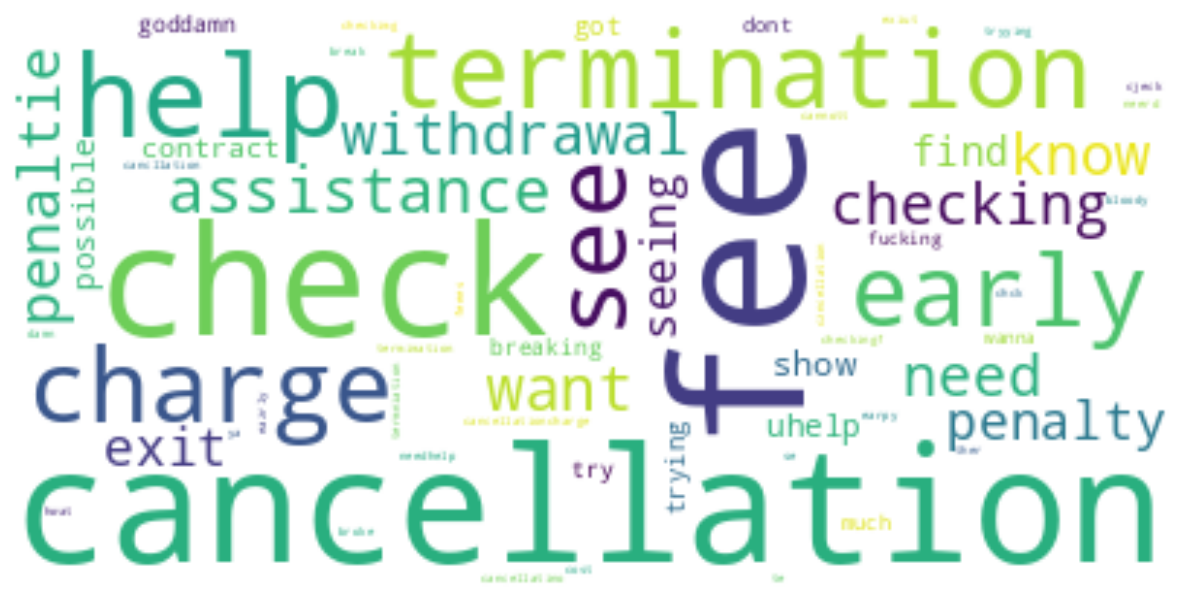



most frequency of word:
[('fee', 142), ('cancellation', 129), ('check', 117), ('help', 58), ('termination', 52), ('charge', 47), ('early', 44), ('see', 43), ('assistance', 38), ('want', 34)]


least frequency of word:
[('wanna', 2), ('fucking', 2), ('cancellationcharge', 1), ('broke', 1), ('feees', 1), ('cancllation', 1), ('termniation', 1), ('cancellatino', 1), ('cjeck', 1), ('neerd', 1), ('needhelp', 1), ('te', 1), ('earpy', 1), ('eazrly', 1), ('hwat', 1), ('bloody', 1), ('damn', 1), ('ya', 1), ('exiut', 1), ('tryying', 1), ('cannott', 1), ('chck', 1), ('se', 1), ('checkimg', 1), ('czncellation', 1), ('checkingf', 1), ('ther', 1), ('termimation', 1), ('cost', 1)]


In [ ]:
word_cloud(data)

### INVOICE

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='INVOICE'].copy().reset_index(drop=True)

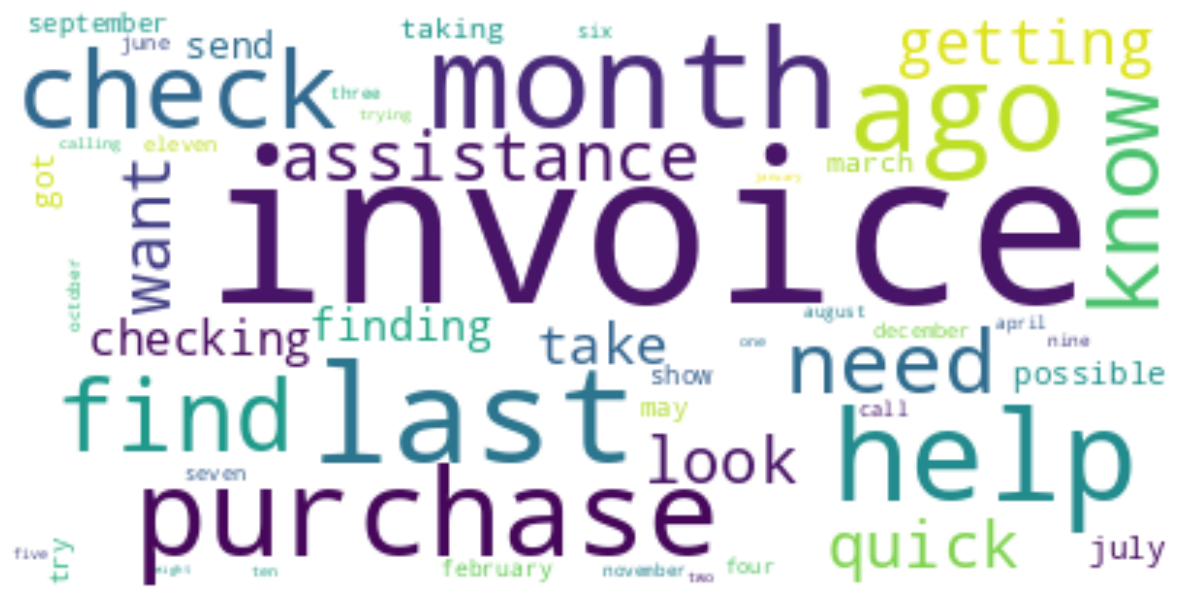



most frequency of word:
[('invoice', 526), ('last', 152), ('month', 151), ('help', 133), ('purchase', 119), ('ago', 118), ('check', 90), ('find', 75), ('know', 70), ('need', 58)]


least frequency of word:
[('july', 10), ('got', 10), ('taking', 9), ('march', 9), ('show', 8), ('may', 8), ('try', 8), ('september', 8), ('february', 7), ('four', 6), ('seven', 6), ('june', 6), ('december', 6), ('six', 6), ('eleven', 6), ('call', 6), ('october', 5), ('three', 5), ('april', 5), ('nine', 5), ('november', 5), ('august', 5), ('two', 4), ('five', 4), ('one', 4), ('trying', 4), ('ten', 4), ('calling', 4), ('january', 2)]


In [ ]:
word_cloud(data)

### PAYMENT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='PAYMENT'].copy().reset_index(drop=True)

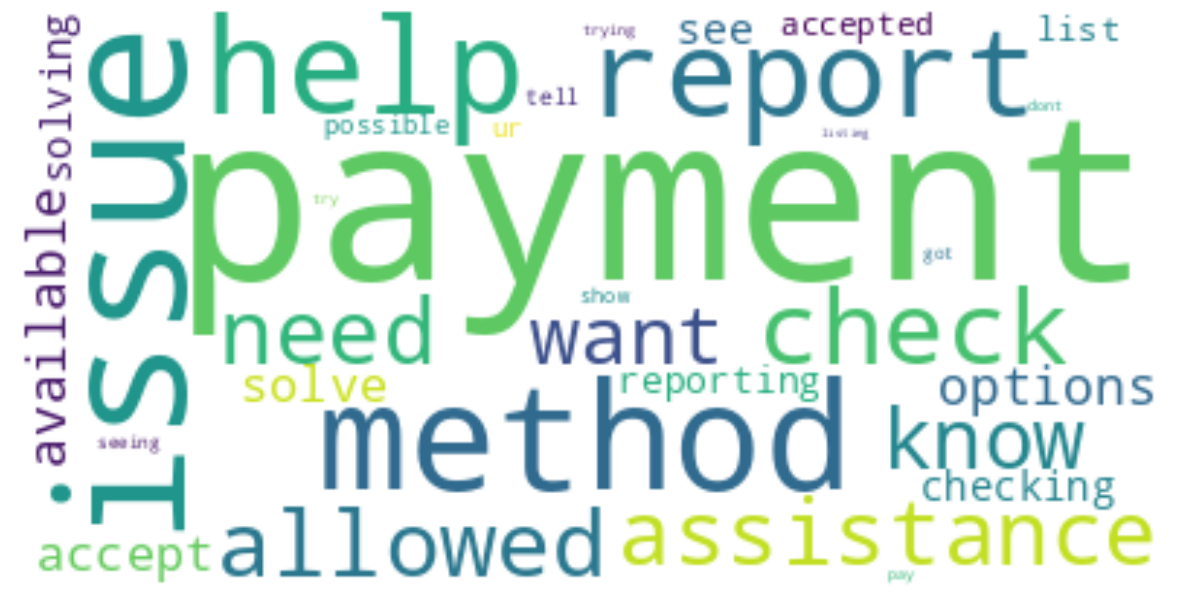



most frequency of word:
[('payment', 499), ('issue', 255), ('method', 182), ('help', 163), ('report', 143), ('check', 106), ('allowed', 80), ('assistance', 74), ('need', 72), ('know', 63)]


least frequency of word:
[('goddamn', 2), ('google', 2), ('regarding', 2), ('question', 2), ('whee', 1), ('bloody', 1), ('paymen', 1), ('pahment', 1), ('th', 1), ('uaccept', 1), ('fucking', 1), ('allowe', 1), ('ccan', 1), ('theavailable', 1), ('urallowed', 1), ('ya', 1), ('paymnent', 1), ('cani', 1), ('methos', 1), ('card', 1), ('apyment', 1), ('wanna', 1), ('amex', 1), ('areavailable', 1), ('paymet', 1), ('assisrance', 1), ('damn', 1), ('otions', 1), ('metods', 1)]


In [ ]:
word_cloud(data)

### REFUND

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='REFUND'].copy().reset_index(drop=True)

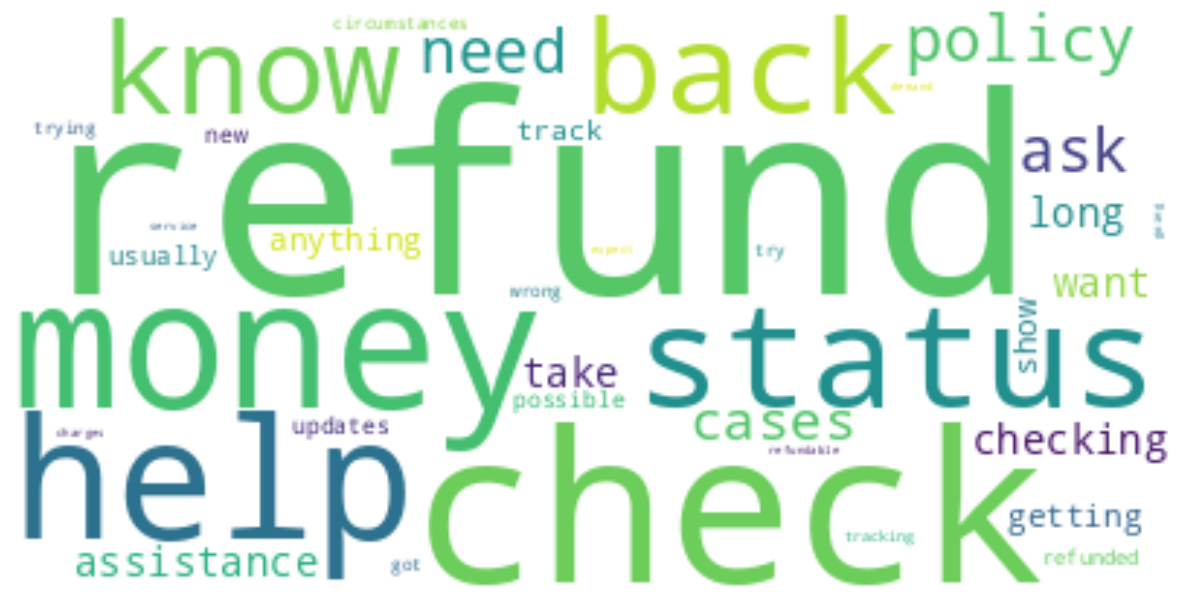



most frequency of word:
[('refund', 584), ('check', 310), ('money', 209), ('help', 195), ('status', 138), ('back', 110), ('know', 98), ('policy', 94), ('need', 85), ('ask', 83)]


least frequency of word:
[('show', 38), ('getting', 38), ('anything', 37), ('track', 33), ('usually', 27), ('new', 23), ('updates', 23), ('possible', 21), ('refunded', 17), ('got', 14), ('circumstances', 14), ('wrong', 14), ('try', 13), ('trying', 11), ('tracking', 6), ('charges', 4), ('refundable', 4), ('service', 4), ('expect', 3), ('demand', 3), ('going', 3), ('entitled', 1), ('according', 1), ('receiving', 1), ('rebate', 1), ('compensations', 1), ('goddamn', 1), ('reimburfsement', 1), ('processed', 1)]


In [ ]:
word_cloud(data)

### FEEDBACK

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='FEEDBACK'].copy().reset_index(drop=True)

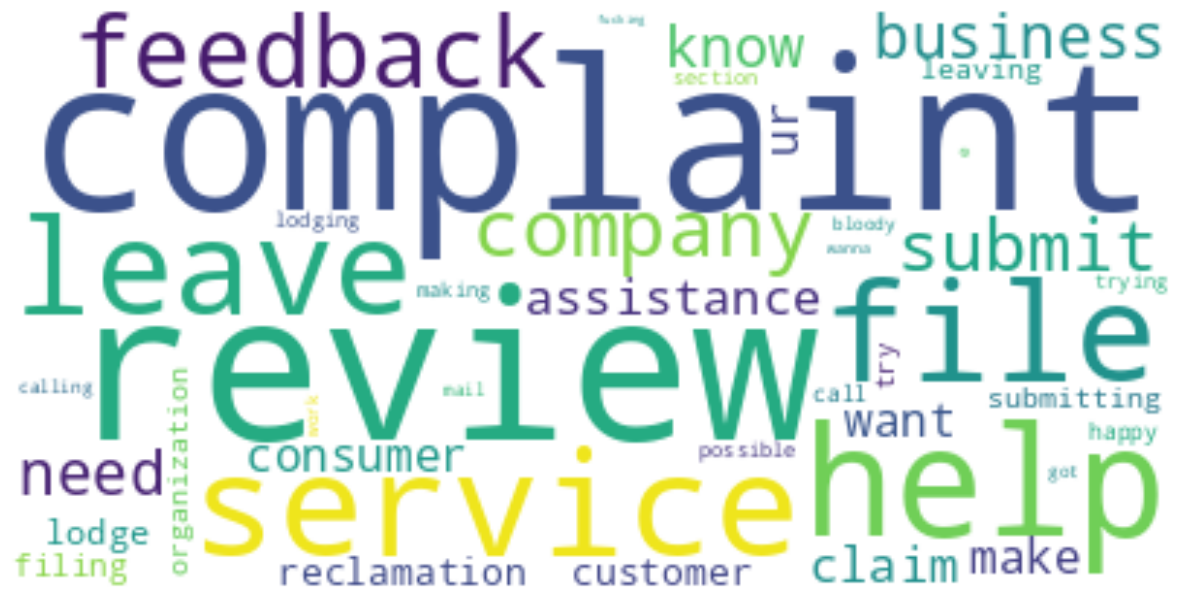



most frequency of word:
[('complaint', 151), ('review', 147), ('help', 130), ('service', 120), ('file', 109), ('leave', 108), ('feedback', 101), ('company', 96), ('submit', 89), ('business', 64)]


least frequency of word:
[('wanna', 4), ('fucking', 3), ('dont', 2), ('ya', 2), ('product', 2), ('canyou', 1), ('tgry', 1), ('helo', 1), ('unhappy', 1), ('mke', 1), ('lcaim', 1), ('organizxation', 1), ('hepp', 1), ('filer', 1), ('youur', 1), ('relcamation', 1), ('acustomer', 1), ('wiht', 1), ('filign', 1), ('commpany', 1), ('filea', 1), ('hbelp', 1), ('reclamaqtion', 1), ('rfeclamation', 1), ('unsatisfied', 1), ('copmlaint', 1), ('lodhe', 1), ('cutomer', 1), ('consmuer', 1)]


In [ ]:
word_cloud(data)

### CONTACT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='CONTACT'].copy().reset_index(drop=True)

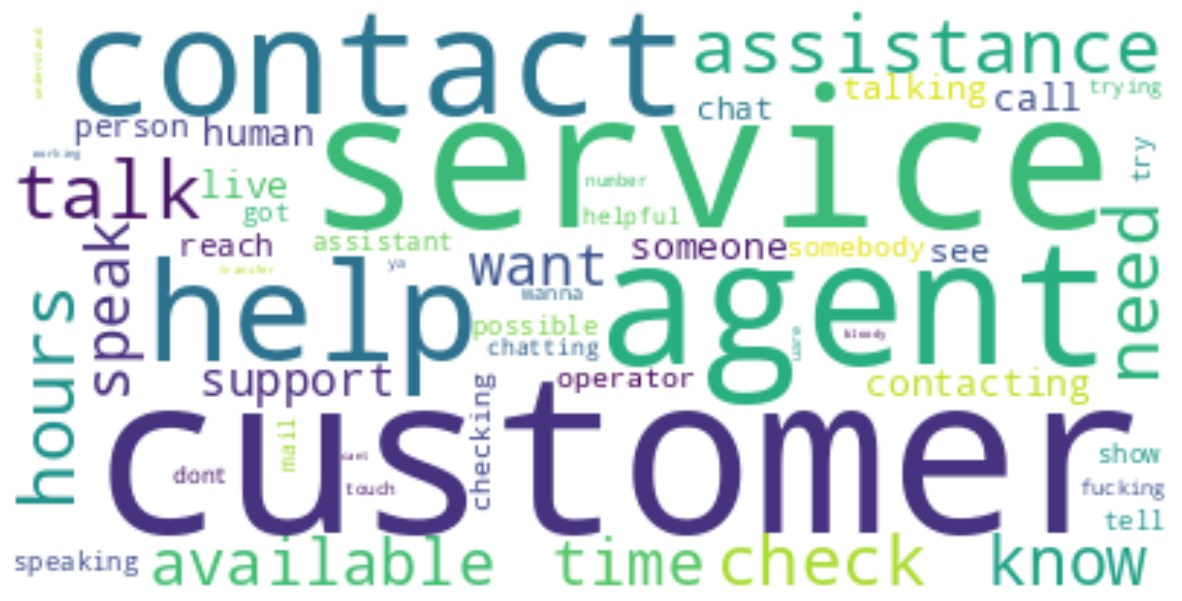



most frequency of word:
[('customer', 251), ('service', 184), ('agent', 146), ('contact', 135), ('help', 119), ('assistance', 84), ('talk', 82), ('hours', 74), ('need', 73), ('check', 69)]


least frequency of word:
[('wantg', 1), ('whattime', 1), ('asistance', 1), ('uhave', 1), ('ohurs', 1), ('avialable', 1), ('ay', 1), ('aent', 1), ('someody', 1), ('tto', 1), ('wit', 1), ('wan', 1), ('word', 1), ('say', 1), ('huma', 1), ('needhelp', 1), ("do't", 1), ('hyman', 1), ('wanmt', 1), ('totalk', 1), ('anything', 1), ('usay', 1), ('uirect', 1), ('wiht', 1), ('ocntact', 1), ('witth', 1), ('contactig', 1), ('uarenot', 1), ('chattinb', 1)]


In [ ]:
word_cloud(data)

### ACCOUNT

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='ACCOUNT'].copy().reset_index(drop=True)

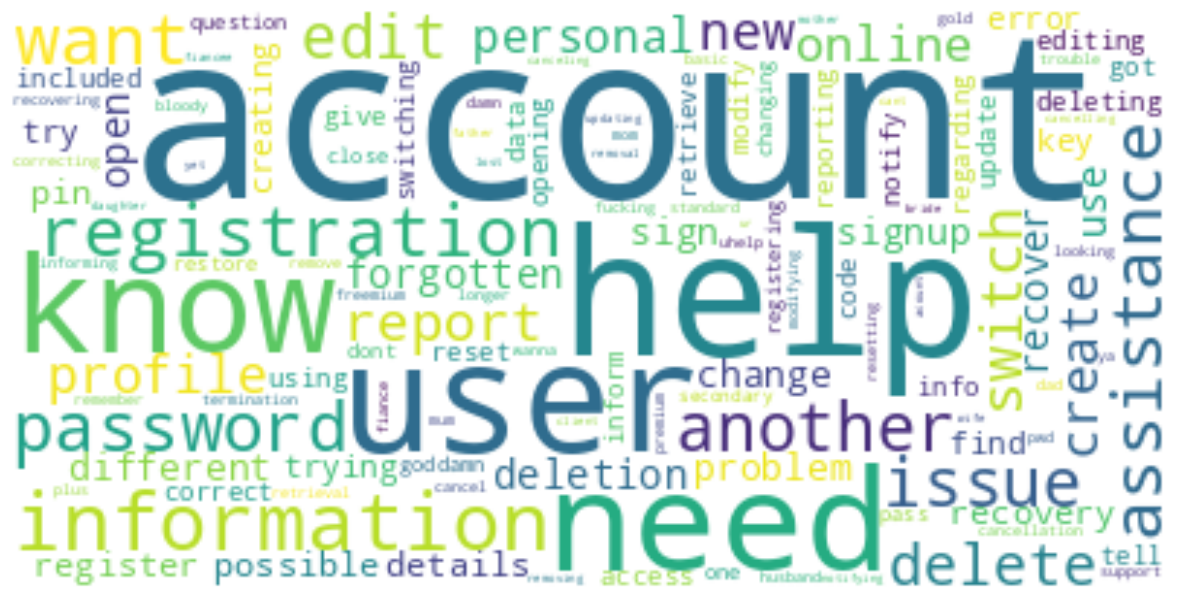



most frequency of word:
[('account', 714), ('help', 353), ('user', 264), ('need', 232), ('know', 206), ('information', 194), ('want', 156), ('registration', 156), ('password', 147), ('assistance', 146)]


least frequency of word:
[('isuses', 1), ('whyat', 1), ('ouruser', 1), ('issud', 1), ('acxount', 1), ('u', 1), ('reegistration', 1), ('informnig', 1), ('sgnup', 1), ('registre', 1), ('uspport', 1), ('reigstration', 1), ('issxues', 1), ('cannott', 1), ('toi', 1), ('regardnig', 1), ('proflie', 1), ('tomy', 1), ('diffreent', 1), ('hewlp', 1), ('changew', 1), ('howi', 1), ('profle', 1), ('wanbt', 1), ('sue', 1), ('ino', 1), ('deo', 1), ('anmother', 1), ('usr', 1)]


In [ ]:
word_cloud(data)

### DELIVERY

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='DELIVERY'].copy().reset_index(drop=True)

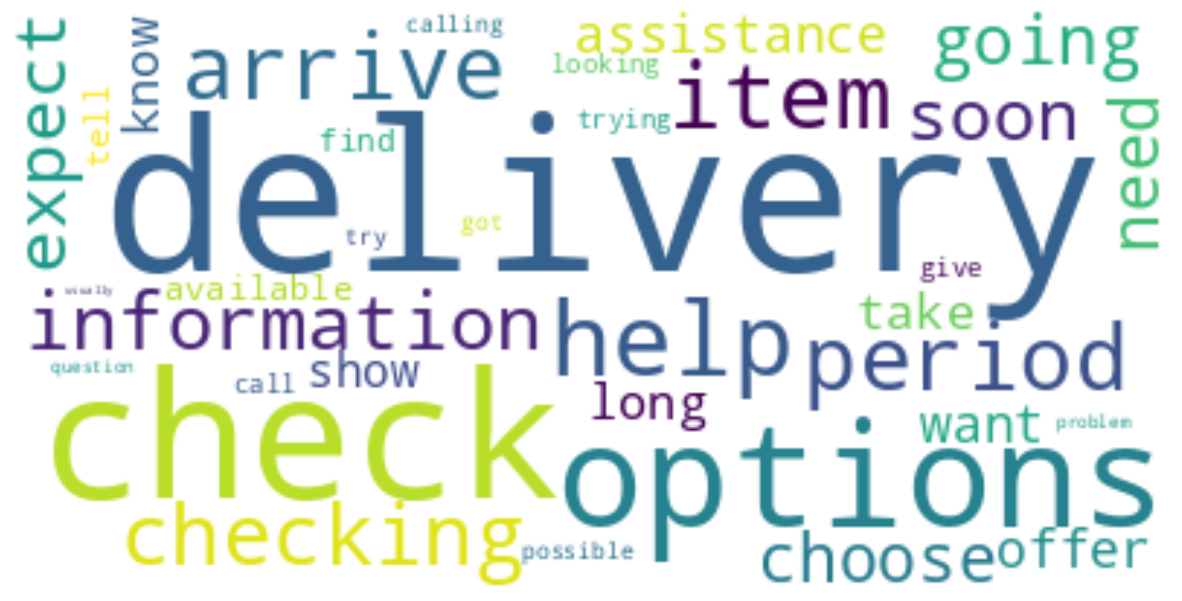



most frequency of word:
[('delivery', 390), ('check', 255), ('options', 236), ('help', 99), ('item', 82), ('arrive', 78), ('period', 77), ('checking', 68), ('information', 58), ('soon', 48)]


least frequency of word:
[('arrive', 78), ('period', 77), ('checking', 68), ('information', 58), ('soon', 48), ('expect', 48), ('going', 45), ('need', 41), ('choose', 41), ('assistance', 40), ('want', 40), ('offer', 38), ('know', 35), ('long', 35), ('take', 35), ('show', 29), ('available', 26), ('tell', 24), ('find', 19), ('trying', 13), ('give', 12), ('looking', 11), ('call', 11), ('got', 9), ('try', 9), ('calling', 8), ('possible', 8), ('problem', 4), ('question', 4)]


In [ ]:
word_cloud(data)

### NEWSLETTER

In [ ]:
data = wordCloud_data['utterance'][wordCloud_data['category']=='NEWSLETTER'].copy().reset_index(drop=True)

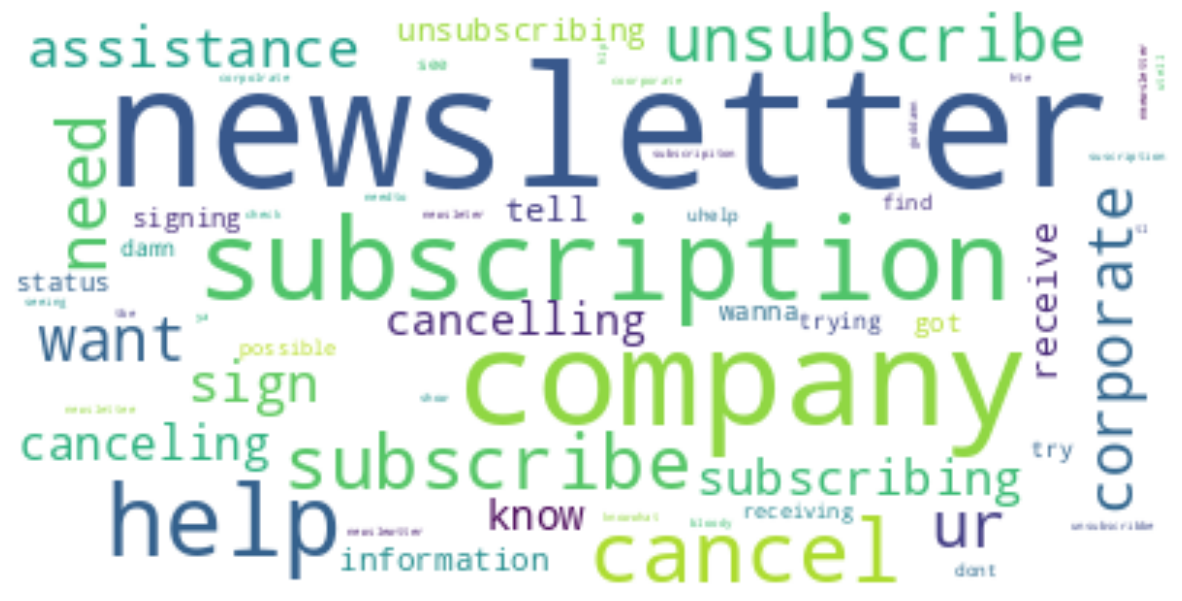



most frequency of word:
[('newsletter', 234), ('company', 144), ('subscription', 97), ('help', 73), ('cancel', 57), ('subscribe', 43), ('need', 33), ('ur', 31), ('unsubscribe', 30), ('corporate', 26)]


least frequency of word:
[('trying', 4), ('try', 4), ('find', 3), ('receiving', 3), ('possible', 3), ('uhelp', 2), ('see', 2), ('dont', 2), ('corpolrate', 1), ('bloody', 1), ('show', 1), ('suscription', 1), ('tbe', 1), ('nmewsletter', 1), ('subscripiton', 1), ('check', 1), ('knowwhat', 1), ('coorporate', 1), ('newslettee', 1), ('unsubscribbe', 1), ('goddamn', 1), ('utell', 1), ('ya', 1), ('tl', 1), ('seeing', 1), ('hlp', 1), ('hte', 1), ('newsleter', 1), ('newslewtter', 1)]


In [ ]:
word_cloud(data)

### statistical test between intent and category

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2


chi2_check = {}


prob = 0.95
chi, p, dof, ex = chi2_contingency(pd.crosstab(df['category'], df['intent']))
chi2_check.setdefault('Feature',[]).append('category')
chi2_check.setdefault('chi',[]).append(chi)
chi2_check.setdefault('critical 0.05',[]).append(chi2.ppf(prob, dof))
chi2_check.setdefault('p-value',[]).append(round(p, 10))
chi2_check.setdefault('alpha',[]).append('0.05')

chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result

Feature      chi  critical 0.05  p-value alpha
0  category  65390.0     298.610588      0.0  0.05



*   If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
*   If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

*   If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
*   If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.

Based on the Chi2 test, it can be seen that the category variable has a significant influence on the target intent variable. We can use the category variable to use in modeling if needed.

# Preprocessing

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import math
import string
import unicodedata

from nltk.stem import PorterStemmer
import contractions

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
contraction = {key.lower(): value.lower() for key, value in contractions.contractions_dict.items()}

In [ ]:
class Prepro(BaseEstimator, TransformerMixin):

    def normalize(self, text):
        text = text.lower()
        text = text.split()

        for idx, word in enumerate(text):

          if word in list(contraction.keys()):
            text[idx] = contraction[word]

        return ' '.join(text)

    def cleansing(self, text):

        text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
        text = re.sub(r'[0-9]', '', text) # number
        text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
        text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
        text = re.sub(r' +', ' ', text)
        text = text.strip()

        return text.lower()

    def stopwords(self, text):

        text = text.split()

        text = [word for word in text if word not in stpwrds]

        return ' '.join(text)

    def stemming(self, text):

        text = text.split()
        stemmer = PorterStemmer()

        return ' '.join([stemmer.stem(word) for word in text])

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X_copy = X.copy()  # Make a copy to avoid modifying the original DataFrame
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.normalize(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.cleansing(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stopwords(x))
        X_copy['utterance'] = X_copy['utterance'].apply(lambda x: self.stemming(x))

        return X_copy

In [ ]:
train_df = df.copy()
valid_df = pd.read_csv('/content/drive/MyDrive/OMDENA DATASET/df_validation.csv')

In [ ]:
preprocessor = Prepro()

In [ ]:
train_df = preprocessor.fit_transform(train_df)

In [ ]:
valid_df = preprocessor.transform(valid_df)

In [ ]:
train_df

utterance        intent category tags  length
0              possibl cancel order made  cancel_order    ORDER  BIP      10
1                           cancel order  cancel_order    ORDER   BK       2
2     need assist cancel last order made  cancel_order    ORDER    B      10
3              problem cancel order made  cancel_order    ORDER    B       7
4                 know cancel order made  cancel_order    ORDER    B      10
...                                  ...           ...      ...  ...     ...
6534                   know track refund  track_refund   REFUND   BE      13
6535                  check refund statu  track_refund   REFUND   BK       3
6536             help check refund statu  track_refund   REFUND    B       6
6537                  check updat refund  track_refund   REFUND  BIM      12
6538            check anyth wrong refund  track_refund   REFUND   BI      12

[6539 rows x 5 columns]

In [ ]:
valid_df

utterance        intent category tags
0       want help cancel order made  cancel_order    ORDER    B
1               inform order cancel  cancel_order    ORDER  BIM
2            help cancel last order  cancel_order    ORDER    B
3       need help cancel order made  cancel_order    ORDER    B
4            know cancel order made  cancel_order    ORDER   BE
..                              ...           ...      ...  ...
813          tri check refund statu  track_refund   REFUND    B
814  want assist check refund statu  track_refund   REFUND    B
815  want assist check statu refund  track_refund   REFUND    B
816              check refund statu  track_refund   REFUND   BI
817                    track refund  track_refund   REFUND   BI

[818 rows x 4 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['intent'] = le.fit_transform(train_df['intent'])
valid_df['intent'] = le.transform(valid_df['intent'])

In [ ]:
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True) #shuffle df

In [ ]:
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
keys = le.classes_
values = le.transform(le.classes_)
dictionary = dict(zip(keys, values))
print(dictionary)

{'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}


In [ ]:
re = {v:k for k,v in dictionary.items()}
print(re)

{0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
train = train_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
valid = valid_df.rename(columns={'utterance': 'text', 'intent': 'label'})

In [ ]:
train = train.drop(columns=['category', 'tags', 'length'])
valid = valid.drop(columns=['category', 'tags'])

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_dict(train)
valid_dataset = Dataset.from_dict(valid)

In [ ]:
import datasets
dd = datasets.DatasetDict({"train":train_dataset,"validation":valid_dataset})

# Modeling

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True, padding='max_length')

In [ ]:
tokenized_datasets = dd.map(tokenize_function, batched=True)

Map:   0%|          | 0/6539 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [ ]:
print(tokenized_datasets['train'][0])

{'text': 'inform user account delet', 'label': 11, 'input_ids': [101, 12367, 5310, 4070, 3972, 3388, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 6539
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 818
    })
})

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(
    'text'
)

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
data_collator(tokenized_datasets["train"][0])

You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': tensor([  101, 12367,  5310,  4070,  3972,  3388,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

In [ ]:
import evaluate
import numpy as np

def compute_metrics(eval_pred):
    metric1 = evaluate.load("accuracy")
    metric2 = evaluate.load("precision")
    metric3 = evaluate.load("recall")

    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = metric1.compute(predictions=predictions, references=labels)['accuracy']
    precision = metric2.compute(predictions=predictions, references=labels, average='macro')["precision"]
    recall = metric3.compute(predictions=predictions, references=labels, average='macro')["recall"]

    return {"accuracy": accuracy, "precision": precision, "recall": recall}

In [ ]:
id2label = {0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}
label2id = {'cancel_order': 0, 'change_order': 1, 'change_shipping_address': 2, 'check_cancellation_fee': 3, 'check_invoice': 4, 'check_payment_methods': 5, 'check_refund_policy': 6, 'complaint': 7, 'contact_customer_service': 8, 'contact_human_agent': 9, 'create_account': 10, 'delete_account': 11, 'delivery_options': 12, 'delivery_period': 13, 'edit_account': 14, 'get_invoice': 15, 'get_refund': 16, 'newsletter_subscription': 17, 'payment_issue': 18, 'place_order': 19, 'recover_password': 20, 'registration_problems': 21, 'review': 22, 'set_up_shipping_address': 23, 'switch_account': 24, 'track_order': 25, 'track_refund': 26}

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=27, id2label=id2label, label2id=label2id
)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
from transformers import TrainerCallback, TrainerControl

class LossEqualityCallback(TrainerCallback):

    def __init__(self, max_loss_diff=0.005):
        self.max_loss_diff = max_loss_diff

    # try to stop the training process in a non-overfit condition
    def on_log(self, args, state, control, val={}, **kwargs):

        if 'logs' in kwargs:

          if 'loss' in kwargs['logs']:
            val.setdefault('loss', []).append(kwargs['logs']['loss'])
          elif 'eval_loss' in kwargs['logs']:
            val.setdefault('eval_loss', []).append(kwargs['logs']['eval_loss'])

        if 'loss' in val and 'eval_loss' in val:

          if len(val['loss']) == len(val['eval_loss']):
            if val['loss'][-1] < val['eval_loss'][-1] and abs(val['loss'][-1] - val['eval_loss'][-1]) > self.max_loss_diff:

              control.should_training_stop = True
              print('TRAINING STOP')
              print(f'val: {val}')
              print(state.log_history)

In [ ]:
custom_callback = LossEqualityCallback()

In [ ]:
batch_size = 16
num_train_epochs = 10
logging_steps = len(tokenized_datasets["train"]) // batch_size

training_args = TrainingArguments(
    output_dir='distilbert-base-uncased-OMDENA-cllbck',
    learning_rate=2e-4,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    weight_decay=0.0001,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=True,
    logging_steps=logging_steps
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[custom_callback]
)

Cloning https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck into local empty directory.


In [ ]:
trainer.train()

TRAINING STOP
val: {'loss': [0.3301, 0.0517, 0.0373, 0.0163, 0.0304, 0.0103], 'eval_loss': [0.04330961033701897, 0.05377202108502388, 0.01930803433060646, 0.01795857958495617, 0.017583796754479408, 0.015819163993000984]}
[{'loss': 0.3301, 'learning_rate': 0.00018004889975550123, 'epoch': 1.0, 'step': 408}, {'eval_loss': 0.04330961033701897, 'eval_accuracy': 0.988997555012225, 'eval_precision': 0.9890569701891165, 'eval_recall': 0.9888026712420072, 'eval_runtime': 19.4999, 'eval_samples_per_second': 41.949, 'eval_steps_per_second': 2.667, 'epoch': 1.0, 'step': 409}, {'loss': 0.0517, 'learning_rate': 0.00016009779951100246, 'epoch': 2.0, 'step': 816}, {'eval_loss': 0.05377202108502388, 'eval_accuracy': 0.991442542787286, 'eval_precision': 0.9916314163625991, 'eval_recall': 0.9914453737983151, 'eval_runtime': 18.371, 'eval_samples_per_second': 44.527, 'eval_steps_per_second': 2.831, 'epoch': 2.0, 'step': 818}, {'loss': 0.0373, 'learning_rate': 0.00014014669926650368, 'epoch': 2.99, 'step'

TrainOutput(global_step=2454, training_loss=0.07915212953396403, metrics={'train_runtime': 2048.1117, 'train_samples_per_second': 31.927, 'train_steps_per_second': 1.997, 'total_flos': 5199543047522304.0, 'train_loss': 0.07915212953396403, 'epoch': 6.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.015819163993000984,
 'eval_accuracy': 0.9987775061124694,
 'eval_precision': 0.9988052568697731,
 'eval_recall': 0.9983164983164983,
 'eval_runtime': 18.1122,
 'eval_samples_per_second': 45.163,
 'eval_steps_per_second': 2.871,
 'epoch': 6.0}

In [ ]:
trainer.push_to_hub()

Upload file runs/Aug17_12-26-02_6cdd4fddb545/events.out.tfevents.1692275181.6cdd4fddb545.237.0: 100%|#########…

Upload file runs/Aug17_12-26-02_6cdd4fddb545/events.out.tfevents.1692277295.6cdd4fddb545.237.2: 100%|#########…

To https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck
   27547b6..5b30335  main -> main

   27547b6..5b30335  main -> main

To https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck
   5b30335..8c52814  main -> main

   5b30335..8c52814  main -> main



'https://huggingface.co/GhifSmile/distilbert-base-uncased-OMDENA-cllbck/commit/5b303352f96a30c39f75ce4633aa704538952913'

In [ ]:
trainer.save_model("/content/drive/MyDrive/intent-classification-OMDENA-cllbck")

In [ ]:
trainer.state.log_history[:-2]

[{'loss': 0.3301,
  'learning_rate': 0.00018004889975550123,
  'epoch': 1.0,
  'step': 408},
 {'eval_loss': 0.04330961033701897,
  'eval_accuracy': 0.988997555012225,
  'eval_precision': 0.9890569701891165,
  'eval_recall': 0.9888026712420072,
  'eval_runtime': 19.4999,
  'eval_samples_per_second': 41.949,
  'eval_steps_per_second': 2.667,
  'epoch': 1.0,
  'step': 409},
 {'loss': 0.0517,
  'learning_rate': 0.00016009779951100246,
  'epoch': 2.0,
  'step': 816},
 {'eval_loss': 0.05377202108502388,
  'eval_accuracy': 0.991442542787286,
  'eval_precision': 0.9916314163625991,
  'eval_recall': 0.9914453737983151,
  'eval_runtime': 18.371,
  'eval_samples_per_second': 44.527,
  'eval_steps_per_second': 2.831,
  'epoch': 2.0,
  'step': 818},
 {'loss': 0.0373,
  'learning_rate': 0.00014014669926650368,
  'epoch': 2.99,
  'step': 1224},
 {'eval_loss': 0.01930803433060646,
  'eval_accuracy': 0.9975550122249389,
  'eval_precision': 0.9973807554452715,
  'eval_recall': 0.9972271736977619,
  'eva

In [ ]:
loss = []
val_loss = []
epoch = []

for i in trainer.state.log_history[:-2]:

  if 'loss' in i:
    loss.append(i['loss'])
  elif 'eval_loss' in i:
    val_loss.append(i['eval_loss'])

for j in trainer.state.log_history[:-2]:

  if 'epoch' in j:
    epoch.append(round(j['epoch']))

epoch = list(set(epoch))

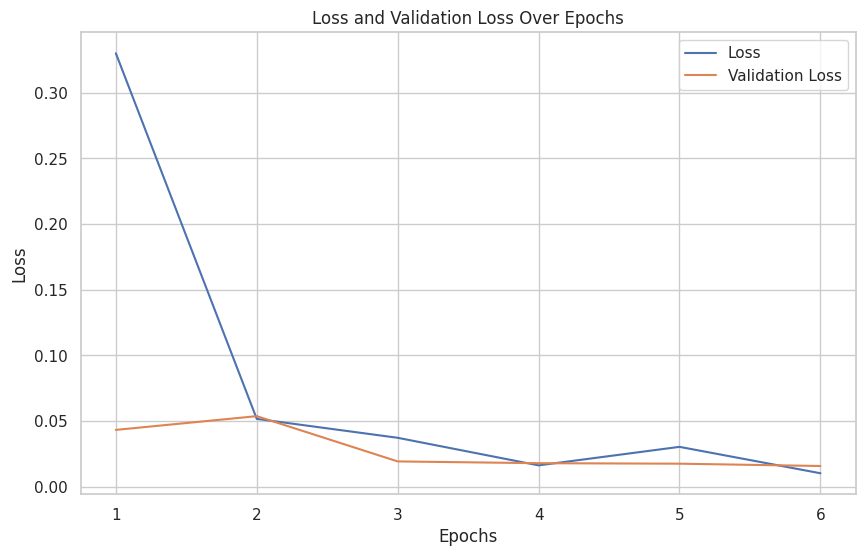

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = pd.DataFrame({'Epochs': epoch, 'Loss': loss, 'Validation Loss': val_loss})

# Create a line plot using Seaborn
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(10, 6))  # Set the size of the plot
plot = sns.lineplot(data=data, x='Epochs', y='Loss', label='Loss')
plot = sns.lineplot(data=data, x='Epochs', y='Validation Loss', label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss and Validation Loss Over Epochs')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Inference

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import string
import unicodedata

import nltk
from nltk.stem import PorterStemmer
import contractions

from sklearn.base import BaseEstimator, TransformerMixin

from wordcloud import STOPWORDS
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
contraction = {key.lower(): value.lower() for key, value in contractions.contractions_dict.items()}

In [ ]:
stpwrds = set(STOPWORDS)

In [ ]:
for i in stopwords.words('english'):

  if i not in stpwrds:
    stpwrds.update([i])

In [ ]:
class Prepro(BaseEstimator, TransformerMixin):

    def normalize(self, text):
        text = text.lower()
        text = text.split()

        for idx, word in enumerate(text):

          if word in list(contraction.keys()):
            text[idx] = contraction[word]

        return ' '.join(text)

    def cleansing(self, text):

        text = re.sub(r"\s+", " ", text, flags=re.UNICODE)
        text = re.sub(r'[0-9]', '', text) # number
        text = (unicodedata.normalize("NFD", text).encode("ascii", "ignore").decode("ascii"))
        text = re.sub(r'[\!\"\”\$\%\&\'\(\)\*\+\,\-\.\/\:\;\<\=\>\?\[\\\]\^\_\`\{\|\}\~\–]', '', text) #punctuation
        text = re.sub(r' +', ' ', text)
        text = text.strip()

        return text.lower()

    def stopwords(self, text):

        text = text.split()

        text = [word for word in text if word not in stpwrds]

        return ' '.join(text)

    def stemming(self, text):

        text = text.split()
        stemmer = PorterStemmer()

        return ' '.join([stemmer.stem(word) for word in text])

    def fit(self, X, y=None):
        return self

    def transform(self, X):

        X = self.normalize(X)
        X = self.cleansing(X)
        X = self.stopwords(X)
        X = self.stemming(X)

        return X

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/intent-classification-OMDENA-cllbck")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("/content/drive/MyDrive/intent-classification-OMDENA-cllbck")

In [ ]:
id2label = {0: 'cancel_order', 1: 'change_order', 2: 'change_shipping_address', 3: 'check_cancellation_fee', 4: 'check_invoice', 5: 'check_payment_methods', 6: 'check_refund_policy', 7: 'complaint', 8: 'contact_customer_service', 9: 'contact_human_agent', 10: 'create_account', 11: 'delete_account', 12: 'delivery_options', 13: 'delivery_period', 14: 'edit_account', 15: 'get_invoice', 16: 'get_refund', 17: 'newsletter_subscription', 18: 'payment_issue', 19: 'place_order', 20: 'recover_password', 21: 'registration_problems', 22: 'review', 23: 'set_up_shipping_address', 24: 'switch_account', 25: 'track_order', 26: 'track_refund'}

In [ ]:
def inference(text, id2label=id2label):
  preprocessing = Prepro()

  for idx, sentence in enumerate(text):

    sentence = preprocessing.fit_transform(sentence)

    encoding = tokenizer(sentence, return_tensors="pt")
    outputs = model(**encoding)
    predictions = int(outputs.logits.argmax(-1))

    text[idx] = id2label[predictions]

  return text

In [ ]:
text = ["i want to change my shipping address","help for create account", "can you change the number i have?"]

In [ ]:
inference(text)

['change_shipping_address', 'create_account', 'recover_password']

# Augmentation Data

In [ ]:
! pip install torch==2.0.1
! pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.7/418.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 43.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 11.6 MB/s eta 

In [ ]:
import pandas as pd
import numpy as np

from textattack.augmentation import EmbeddingAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
embed_aug = EmbeddingAugmenter()

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:27<00:00, 17.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp8ppfqolg.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OMDENA DATASET/df_train.csv')

In [ ]:
df

utterance        intent  \
0      would it be possible to cancel the order I made?  cancel_order   
1                                      cancelling order  cancel_order   
2     I need assistance canceling the last order I h...  cancel_order   
3               problem with canceling the order I made  cancel_order   
4           I don't know how to cancel the order I made  cancel_order   
...                                                 ...           ...   
6534  I do not know what I have to do to track the r...  track_refund   
6535                                check refund status  track_refund   
6536                    help me check the refund status  track_refund   
6537  how can I check if there is any updates on my ...  track_refund   
6538  how do I check if there is anything wrong with...  track_refund   

     category tags  
0       ORDER  BIP  
1       ORDER   BK  
2       ORDER    B  
3       ORDER    B  
4       ORDER    B  
...       ...  ...  
6534   REFUND   BE  
6535   REFUND   BK  
6536   REFUND    B  
6537   REFUND  BIM  
6538   REFUND   BI  

[6539 rows x 4 columns]

In [ ]:
df = df.drop(columns=['tags'])

In [ ]:
def aug_text(x, intent, category):

  data = []

  for i in x:
    data.extend(embed_aug.augment(i))

  return {'utterance':data, 'intent':[intent]*len(data), 'category': category*len(data)}

In [ ]:
# make empty pandas df and adding each colums value based on augmented text

dataset = []

for intent in list(df.intent.unique()):

  data = df.utterance[df['intent'] == intent].copy()
  category = list(df.category[df.intent == intent].unique())

  dataset.append(aug_text(data, intent, category))

In [ ]:
columns = ['utterance', 'intent', 'category']
df_augmentasi = pd.DataFrame(columns=columns)

In [ ]:
df_augmentasi

Empty DataFrame
Columns: [utterance, intent, category]
Index: []

In [ ]:
for data in dataset:
    df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)

<ipython-input-24-d0716e030db7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)
<ipython-input-24-d0716e030db7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)
<ipython-input-24-d0716e030db7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)
<ipython-input-24-d0716e030db7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_augmentasi = df_augmentasi.append(pd.DataFrame(data), ignore_index=True)
<ipython-input-2

In [ ]:
df_augmentasi

utterance        intent category
0     would it be possible to rescinded the order I ...  cancel_order    ORDER
1                                        annulled order  cancel_order    ORDER
2     I need assistance rescind the last order I hav...  cancel_order    ORDER
3              problem with abolishing the order I made  cancel_order    ORDER
4         I don't know how to repealed the order I made  cancel_order    ORDER
...                                                 ...           ...      ...
6534  I do not know what I have to do to track the r...  track_refund   REFUND
6535                            verifying refund status  track_refund   REFUND
6536             help me check the reimbursement status  track_refund   REFUND
6537  how can I inspections if there is any updates ...  track_refund   REFUND
6538  how do I check if there is anything wrong with...  track_refund   REFUND

[6539 rows x 3 columns]

In [ ]:
df_merge =  pd.concat([df, df_augmentasi], ignore_index=True, sort=False)

In [ ]:
df_merge = df_merge.reset_index(drop=True)

In [ ]:
df_merge

utterance        intent  \
0       would it be possible to cancel the order I made?  cancel_order   
1                                       cancelling order  cancel_order   
2      I need assistance canceling the last order I h...  cancel_order   
3                problem with canceling the order I made  cancel_order   
4            I don't know how to cancel the order I made  cancel_order   
...                                                  ...           ...   
13073  I do not know what I have to do to track the r...  track_refund   
13074                            verifying refund status  track_refund   
13075             help me check the reimbursement status  track_refund   
13076  how can I inspections if there is any updates ...  track_refund   
13077  how do I check if there is anything wrong with...  track_refund   

      category  
0        ORDER  
1        ORDER  
2        ORDER  
3        ORDER  
4        ORDER  
...        ...  
13073   REFUND  
13074   REFUND  
13075   REFUND  
13076   REFUND  
13077   REFUND  

[13078 rows x 3 columns]

In [ ]:
df_merge.duplicated(subset='utterance').sum()

53

In [ ]:
df_merge = df_merge.drop_duplicates(subset=['utterance']).reset_index(drop=True)

In [ ]:
df_merge.intent.value_counts()

get_invoice                 529
payment_issue               518
check_invoice               514
contact_customer_service    506
complaint                   502
review                      496
cancel_order                491
check_payment_methods       491
set_up_shipping_address     491
track_order                 490
check_cancellation_fee      490
place_order                 485
check_refund_policy         479
recover_password            478
registration_problems       477
track_refund                477
get_refund                  476
newsletter_subscription     474
delivery_options            471
create_account              471
delete_account              470
delivery_period             467
change_order                464
edit_account                462
change_shipping_address     456
switch_account              453
contact_human_agent         447
Name: intent, dtype: int64

In [ ]:
df_merge.to_csv('/content/drive/MyDrive/OMDENA DATASET/df_train_augmentasi.csv', index=False)